# Анализ убытков приложения ProcrastinatePRO+

**Описание проекта**

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

Вам предстоит изучить:
откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import datetime


In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'))  # траты на рекламу

#### Знакомство с данными

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Ознакомившись с данными мы можем сказать, чтоне все данные приведены к нужному типу (точнее столбцы с датами), а также в названии столбцов присутствует верхний регистр. 

#### Предобработка данных

In [9]:
# Меняем регистр в названиях столбцов и меняем разделение слов
visits.columns = visits.columns.str.replace(' ', '_').str.lower()
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
costs.columns = costs.columns.str.replace(' ', '_').str.lower()

In [10]:
# Проверяем наличие дубликатов
visits.duplicated().sum() 

0

In [11]:
orders.duplicated().sum()

0

In [12]:
costs.duplicated().sum()

0

In [13]:
# Меняем типы данных в столбцах с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [14]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Таким образом, мы обработали данные, изменили названия столбцов, а также поменяли тип данных там, где это необходимо. Проверили данные на дубликаты и пропуски, они отсутствуют.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [17]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [18]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Мы задали изученные ранее функции для расчёта и анализа LTV, ROI, удержания и конверсии 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Пункт

In [25]:
# Составим профили
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5)) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [26]:
# Определим максимальную и минимальную даты привлечения
dt_max = profiles['dt'].max()
dt_min = profiles['dt'].min()

In [27]:
dt_max

datetime.date(2019, 10, 27)

In [28]:
dt_min

datetime.date(2019, 5, 1)

Таким образом, мы составили профили покупателей и определили минимальную (1 мая 2019) и максимальную (27 октября 2019) даты привлечения пользователей, что соответствет описанию проекта

#### Пункт

In [29]:
profiles_payer = (profiles.query('payer == True').groupby('region').agg({'user_id' : 'nunique'})
                  .sort_values(by = 'user_id'))
profiles_payer

,user_id
region,
Germany,616
France,663
UK,700
United States,6902


In [30]:
profiles_region = (profiles.groupby('region').agg({'user_id' : 'nunique'})
                  .sort_values(by = 'user_id'))
profiles_region

,user_id
region,
Germany,14981
France,17450
UK,17575
United States,100002


In [31]:
buyer_region = profiles_payer.merge(profiles_region, on = 'region', how='inner')
buyer_region['Доля покупателей'] = buyer_region['user_id_x']/buyer_region['user_id_y'] * 100
buyer_region.sort_values(by = 'Доля покупателей').style.format("{:.2f}")

,user_id_x,user_id_y,Доля покупателей
region,,,
France,663.00,17450.00,3.80
UK,700.00,17575.00,3.98
Germany,616.00,14981.00,4.11
United States,6902.00,100002.00,6.90


По таблице мы видим, что пользователи находятся в 4 странах: Германии, Франции, Великобритании и США. Больше всего плятящих пользователей в США (почти 7%), меньше всего покупателей из Франции.

На основе посчитанного выше напишем функцию, которая будет принимать таблицу профилей и параметр группировки "а".

In [32]:
def buyers(profiles, a):
    profiles_payer = (profiles.query('payer == True').groupby(a).agg({'user_id' : 'nunique'})
                  .sort_values(by = 'user_id'))
    profiles_region = (profiles.groupby(a).agg({'user_id' : 'nunique'})
                  .sort_values(by = 'user_id'))
    buyer_region = profiles_payer.merge(profiles_region, on = a, how='inner')
    buyer_region['Доля покупателей'] = buyer_region['user_id_x']/buyer_region['user_id_y'] * 100

    return buyer_region.sort_values(by = 'Доля покупателей').style.format("{:.2f}")

#### Пункт

Построим таблицу с долей платящих пользователей по устройствам

In [33]:
buyers_device = buyers(profiles, 'device')
buyers_device

,user_id_x,user_id_y,Доля покупателей
device,,,
PC,1537.00,30455.00,5.05
Android,2050.00,35032.00,5.85
iPhone,3382.00,54479.00,6.21
Mac,1912.00,30042.00,6.36


По табдицу мы видим, что наибольщая доля платящих пользователей у тех, кто использует Мас(6.4%), а наименьшая у пользователей РС(5%)

#### Пункт

Построим таблицу с долей платящих пользователей по каналам привлечения

In [34]:
buyers_channel = buyers(profiles, 'channel')
display(buyers_channel)

,user_id_x,user_id_y,Доля покупателей
channel,,,
organic,1160.00,56439.00,2.06
OppleCreativeMedia,233.00,8605.00,2.71
LeapBob,262.00,8553.00,3.06
MediaTornado,156.00,4364.00,3.57
YRabbit,165.00,4312.00,3.83
WahooNetBanner,453.00,8553.00,5.30
RocketSuperAds,352.00,4448.00,7.91
TipTop,1878.00,19561.00,9.60
lambdaMediaAds,225.00,2149.00,10.47


Больше всего платящих пользователей принесли FaceBoome(12%) и AdNonSense (11%), а меньше всего OppleCreativeMedia(2.7%). У органических пользоватей наимешая доля плательщиков - 2%.

Таким образом, мы определили доли платящих пользователей в зависимости от региона, устройства пользования и канала привлечения. Больще всего покупателей в США, среди пользователей Мас и у тех, кто пришел благодаря FaceBoom.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Пункт

In [35]:
costs['costs'].sum()

105497.30000000002

Общие расходы на маркетинг составили 105 497 д.е.

#### Пункт

In [36]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by = 'costs')

,costs
channel,
YRabbit,944.22
MediaTornado,954.48
lambdaMediaAds,1557.60
LeapBob,1797.60
RocketSuperAds,1833.00
OppleCreativeMedia,2151.25
AdNonSense,3911.25
WahooNetBanner,5151.00
FaceBoom,32445.60


Проанализировав траты на источники привлечения, можно сказать, что юольше всего трат принес TipTop (54 751 д.е.) и FaceBoom (32 445 д.е.)

#### Пункт

In [37]:
# Добавим в таблицу расходов месяцы и недели
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

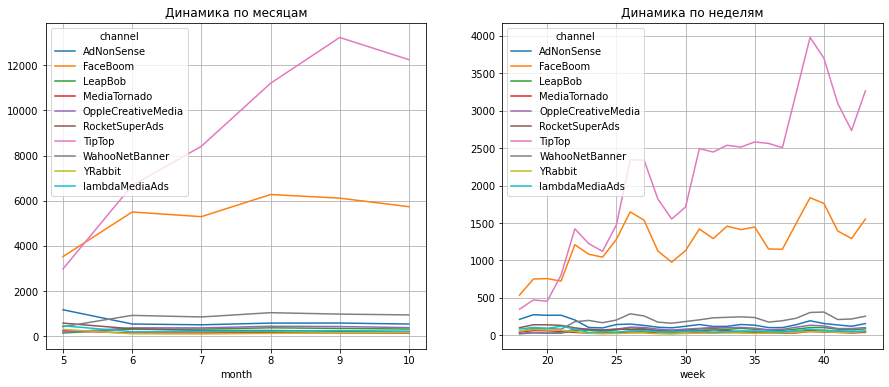

In [38]:
# Сделаем сводные таблицы и построим графики
costs_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
costs_week = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
plt.figure(figsize=(15, 6))
costs_month.plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика по месяцам')
costs_week.plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика по неделям')
plt.show()

По графикам можно увидеть, что за период исследования регулярно росли траты на канал привлечения TipTop (резкие скачки пришлись на 23, 26 и 38 недели), также росли траты на FaceBoom (скачки и спады наблюдаются на тех же неделях). Если рассмотреть WahooNetBanner можно также увидеть схожесть в скачках графика на определенных неделях. Это может говорить о том, что в определенный период компания активно начинает закупать рекламу у большого числа рекламодатей с целью привлечь больше клиентов, возможно, перед каким-то событием (празниками, скидками, акциями). Затраты на остальные каналы за период исследования были примерно стабильны.

#### Пункт

In [39]:
#Уберем из профилей органических пользователей, тк они не требуют затрат
profiles_no_org = profiles.query('channel != "organic"')
profiles_no_org.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000


In [40]:
cac = (profiles_no_org.groupby('channel').agg({'acquisition_cost': 'mean'})
.sort_values(by='acquisition_cost'))
cac

,acquisition_cost
channel,
LeapBob,0.210172
MediaTornado,0.218717
YRabbit,0.218975
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
WahooNetBanner,0.602245
lambdaMediaAds,0.724802
AdNonSense,1.008054
FaceBoom,1.113286


По результатам мы видим, что наибольшие затраты на 1 покупателя приходятся на TipTop (2.8 д.е) и на FaceBoom (1.1 д.е), а наименьшая у LeapBob и MediaTornado (по 0.2 д.е)

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Анализ будем поводить без органических пользователей. Будем использовать таблицу `profiles_no_org`

In [41]:
# Зададим момент анализа и горизонт
observation_date = datetime.date(2019, 11, 1)
horizon_days = 14

#### Пункт

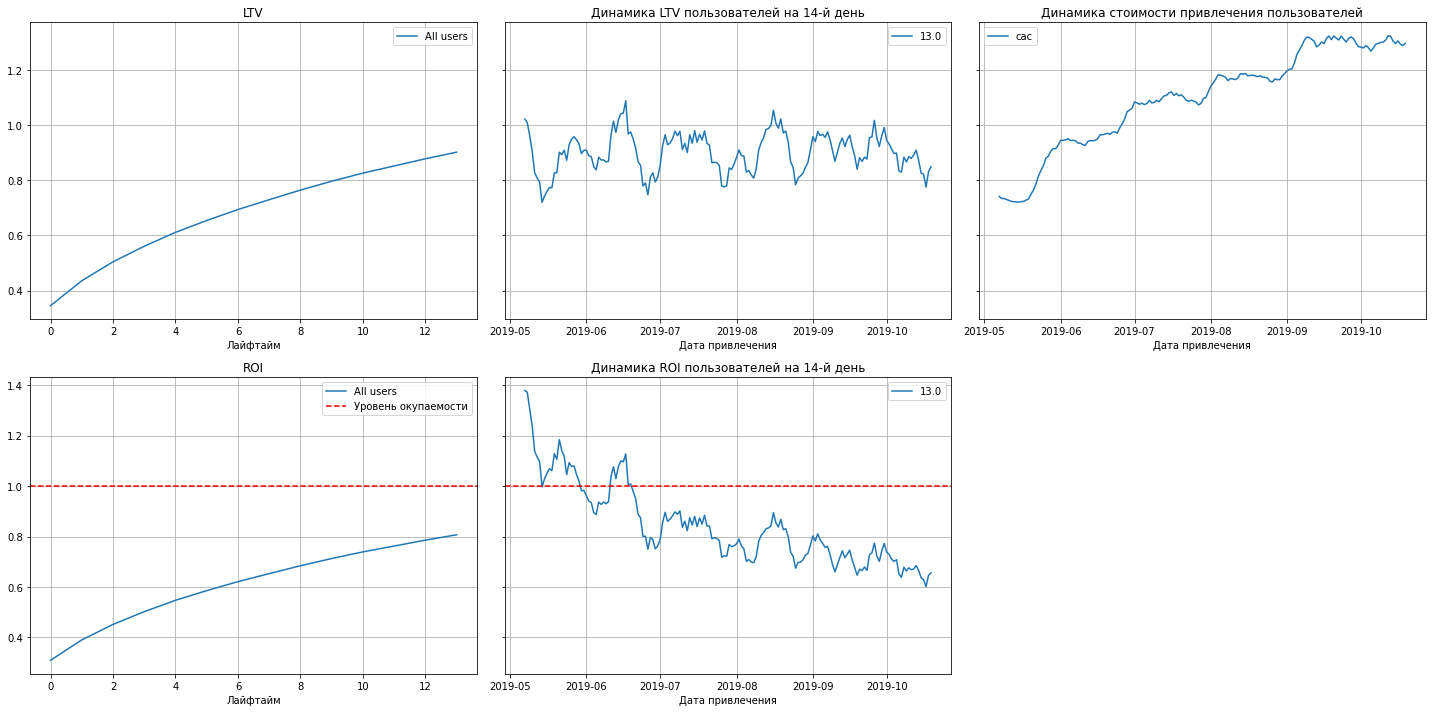

In [42]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
1. Реклама не окупается. ROI в конце 2 недели — чуть выше 80%. Начиная с июня коготры перестают окупаться.
2. CAC ежемесячно растет.
3. LTV достаточно стабилено растет на протяжении лайфтайма. В динамике мы видим, что LTV держиться на уровне от 0.8 до 1.0

#### Пункт

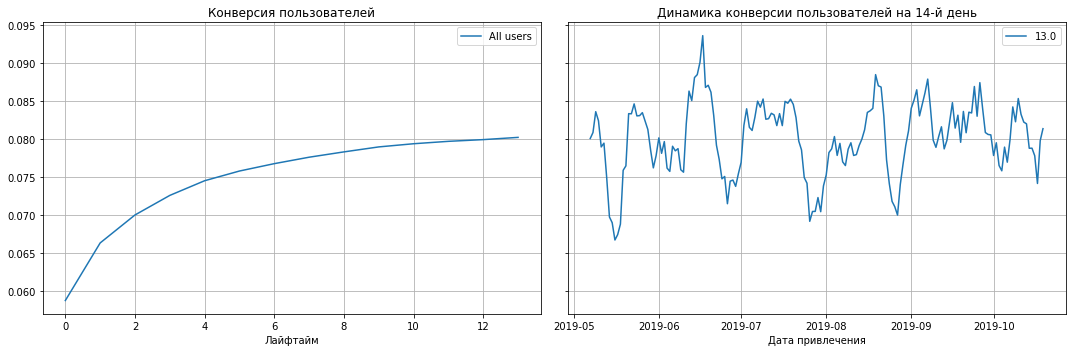

In [43]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_org, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия растет, но ее показатели не привышают 8% за период лайфтайма. В динамике конверсия вальируется от 6.5% до 9.5%.

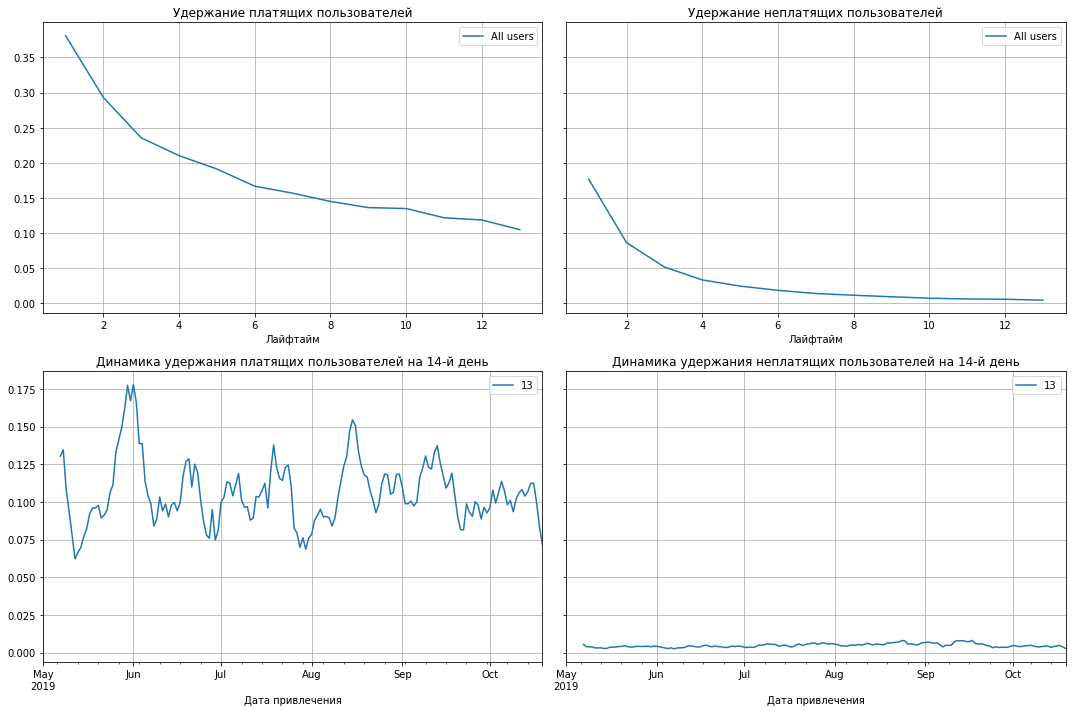

In [44]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_org, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей сильно снижается к концу лайфтайма, а неплатящих и вовсе приближается к 0.

#### Пункт

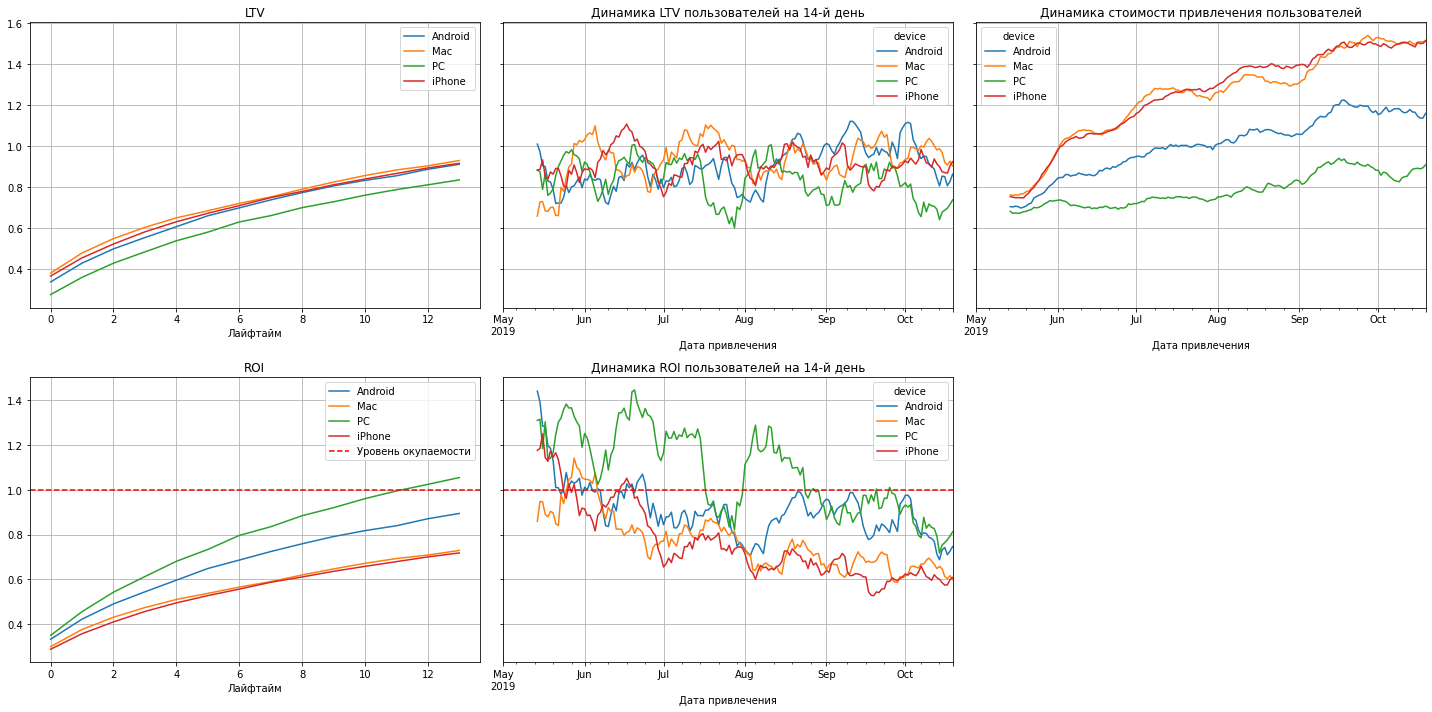

In [45]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV ниже всего у пользователей РС, однако, из-за наиболее низкой стоимости привлечения, это единственное устройство, которое окупается. Стоимость привлечения пользоватей iPhone и Mac наибольшая, но показатели ROI - наименьшие, хотя LTV находиться на уровне пользователей Android. Но вывод все равно один: маркентинговые затраты окупаются лишь у пользователей РС.

#### Пункт

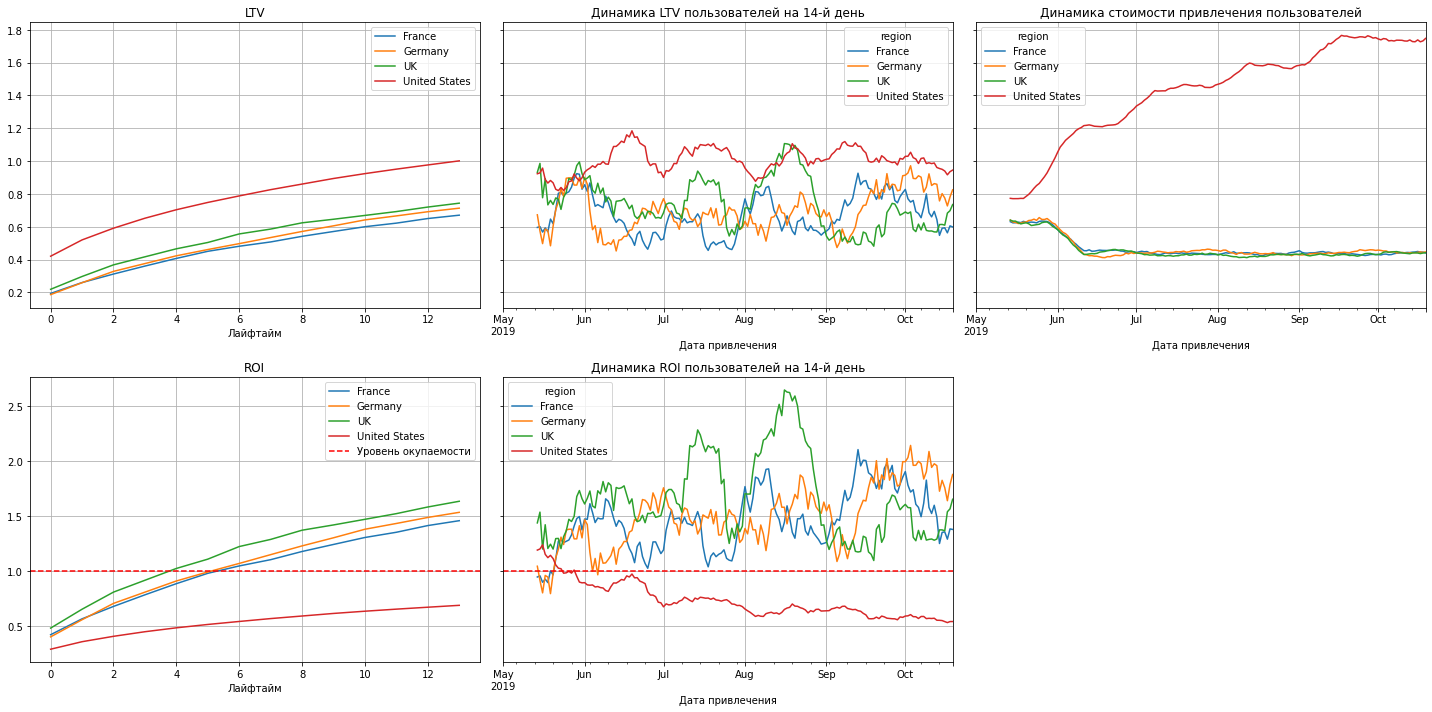

In [46]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Затраты на рекламу не окупаются лишь в США, несмотря на самый высокий LTV в этом регионе стоимость привлечения пользователей постоянно растет. Остальные регионы стабильно окупаются уже на 4-5 лайфтайм. В них динамика привлечения пользователей сокращается в июле и держиться на этом же уровне до конца периода анализа. 

#### Пункт

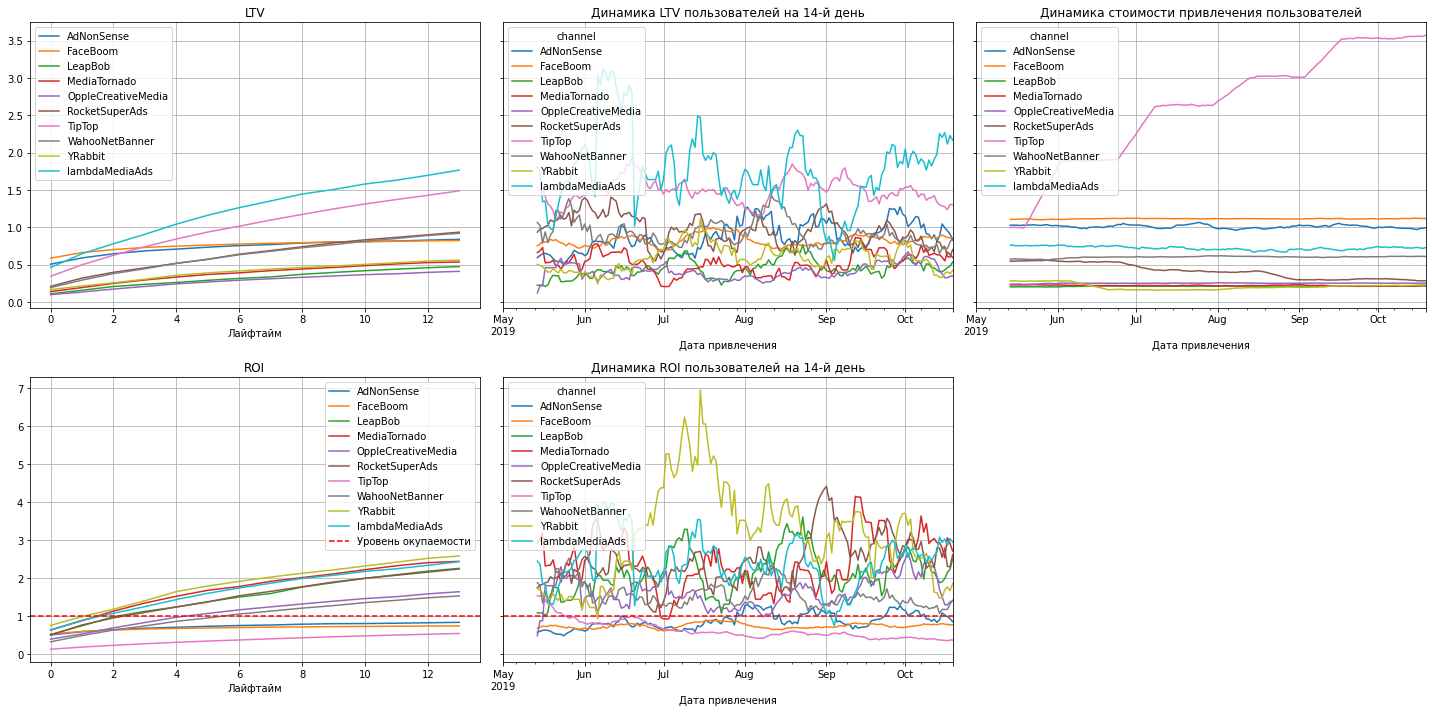

In [47]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Не окупаются 3 канала привлечения: FaceBoom, AdNonSense и TipTop,  при этом стоимость привлечения пользователей через TipTop ежемесячно растет в то время, как для остальных источников она стабильна (кроме RocketSuperAds, где стоимость уменьшается). LTV наибольший у lambdaMediaAds и TipTop, у остальных каналов также стабильно качество привлечения пользователей.

Посмотрим конверсию и удержание по каналам

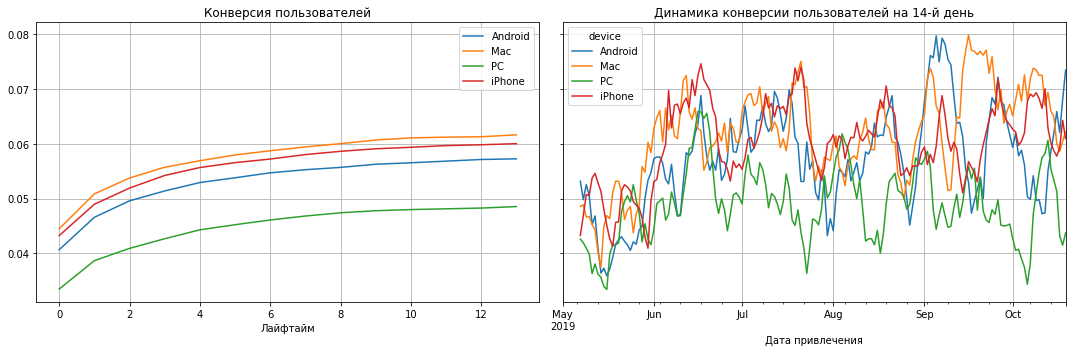

In [48]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

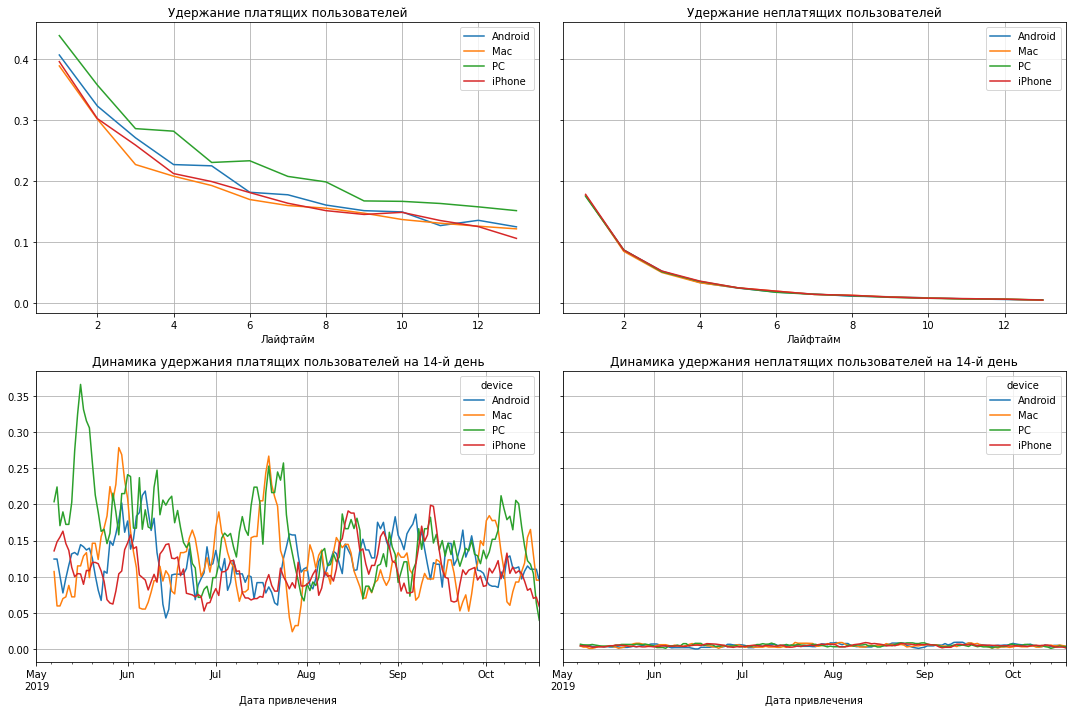

In [49]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Посмотрим конверсию и удержание по регионам

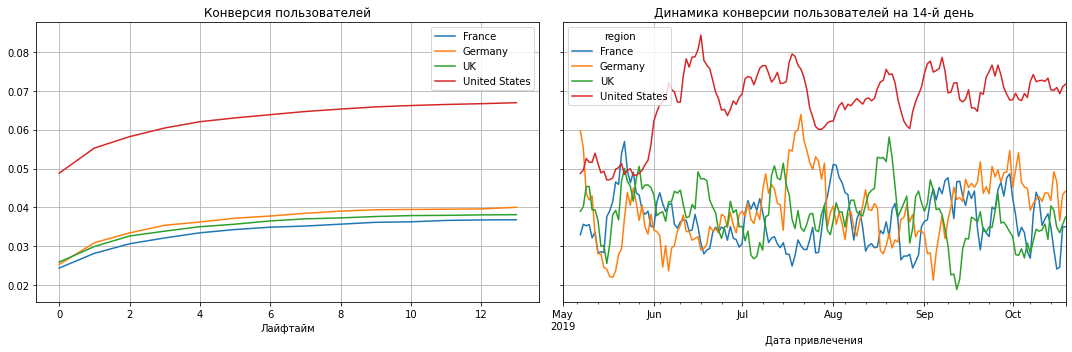

In [50]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

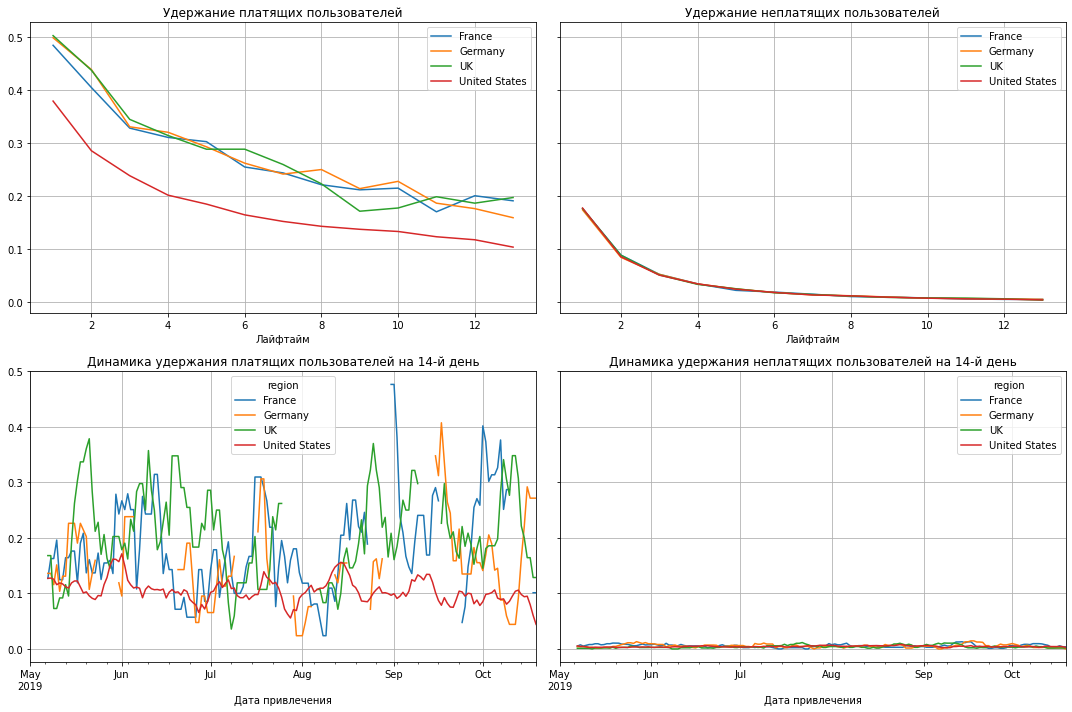

In [51]:
# смотрим удержание с разбивкой по регионам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Посмотрим конверсию и удержание по каналам

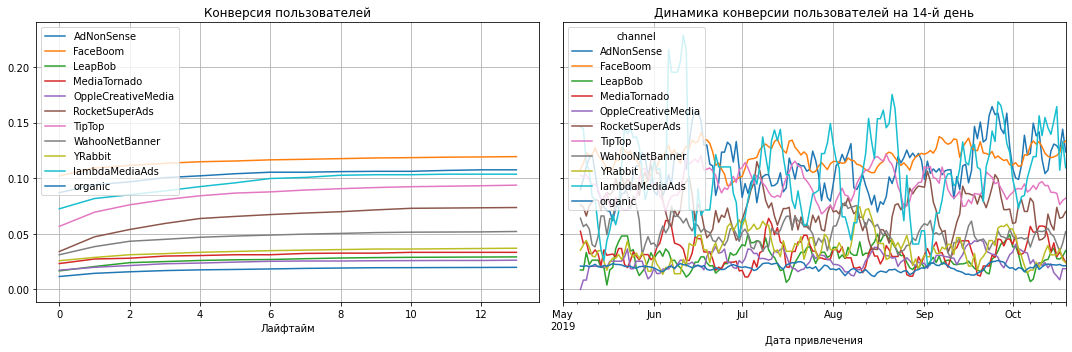

In [52]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

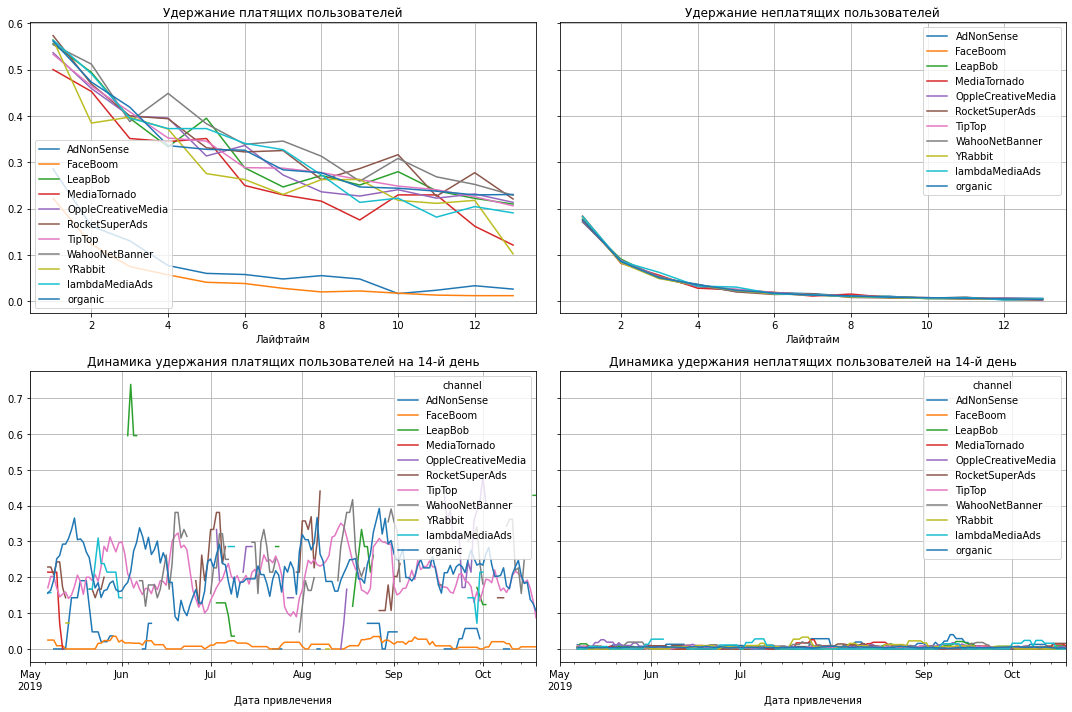

In [53]:
# смотрим удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Таким образом, вы видим, что проблема состоит в том, что наиболее конвертируемые каналы, устройства и регион умеют самое низкое удержание пользователей. Возможно, причины к каких-либо технических проблемах

#### Пункт

1. Окупается ли реклама, направленная на привлечение пользователей в целом?
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
3. Чем могут быть вызваны проблемы окупаемости?

Ответы:
1. В целом реклама не окупается (ROI достигает в концу 2 недели лишь 80%)
2. Наибольшее негативное влияние на окупаемость рекламы оказывают:  устройства - iPhone, Mac и Android; страны - США; рекламные каналы - FaceBoom, AdNonSense и TipTop  
3. Проанализировав графики, можно сказать, что проблема окупаемости связана с чрезмерно высокой ценой привевленеия пользователей и не соответсвующим ей качеством этих пользователей (их пожизненной ценности), что связано с низким удержанием новых пользователей в США, среди владельцев Mac и iPhone, а также у привлеченных через каналы FaceBoom и AdNonSense.

# Проверяем гипотезы

Для составления рекомендаций посмотрим как обстоят дела на разных рынках - европейском и американском.

Так как проблемы с окупаемостью рекламы у нас были исключительно в США. Рассмотрим этот регион отдельно и в разбивке по каналам привлечения

In [54]:
usa = profiles_no_org.query('region == "United States"') 

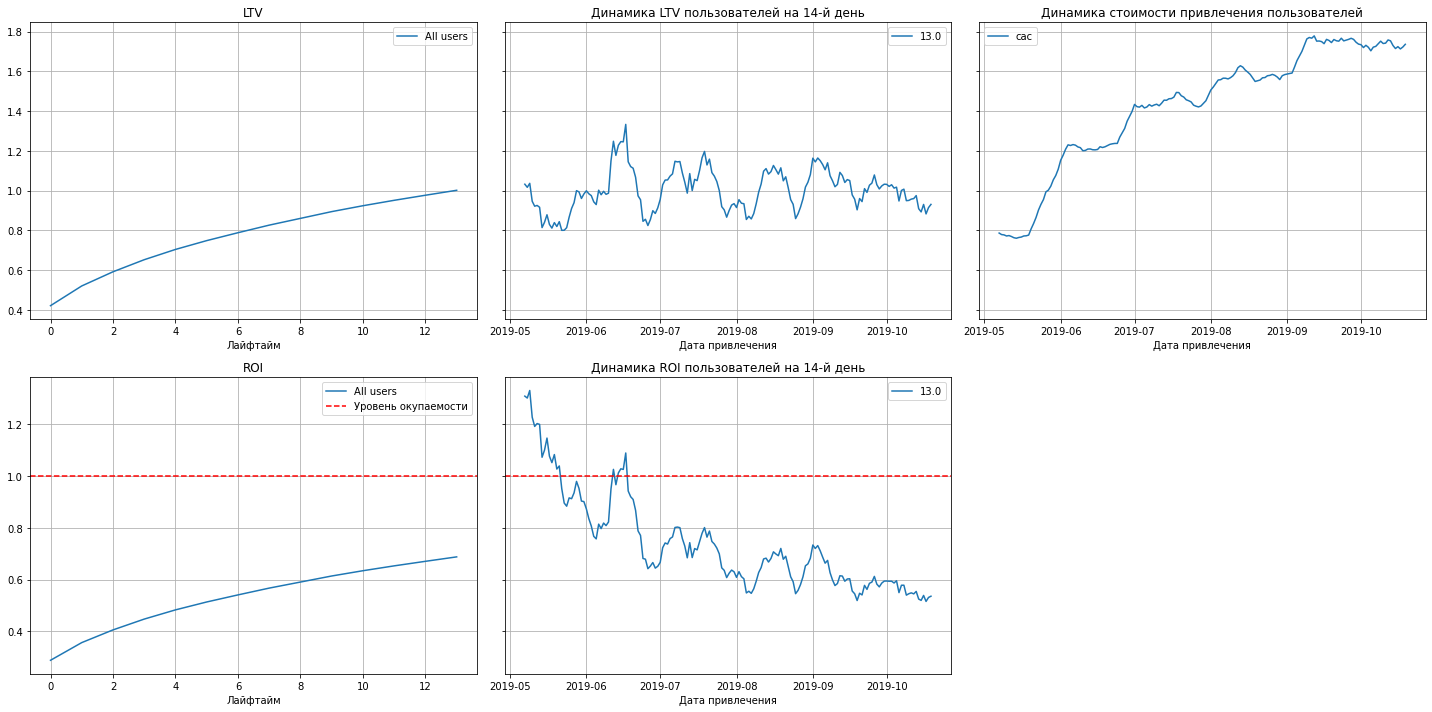

In [55]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

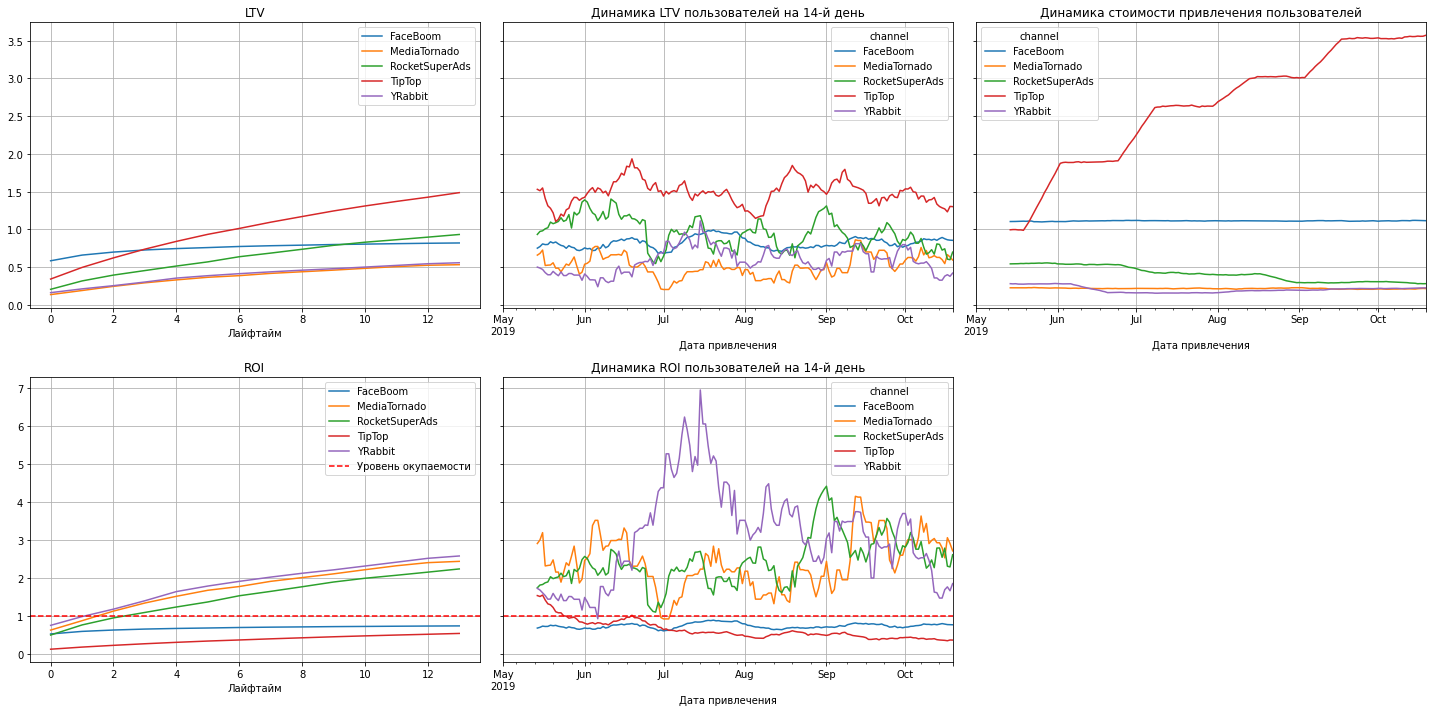

In [56]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В США не окупаются 2 канала FaceBoom и TipTop, стоимость привлечения пользователей через последний регулярно растет и в разы превышает стоимость остальных.

In [57]:
eu = profiles_no_org.query('region != "United States"') 

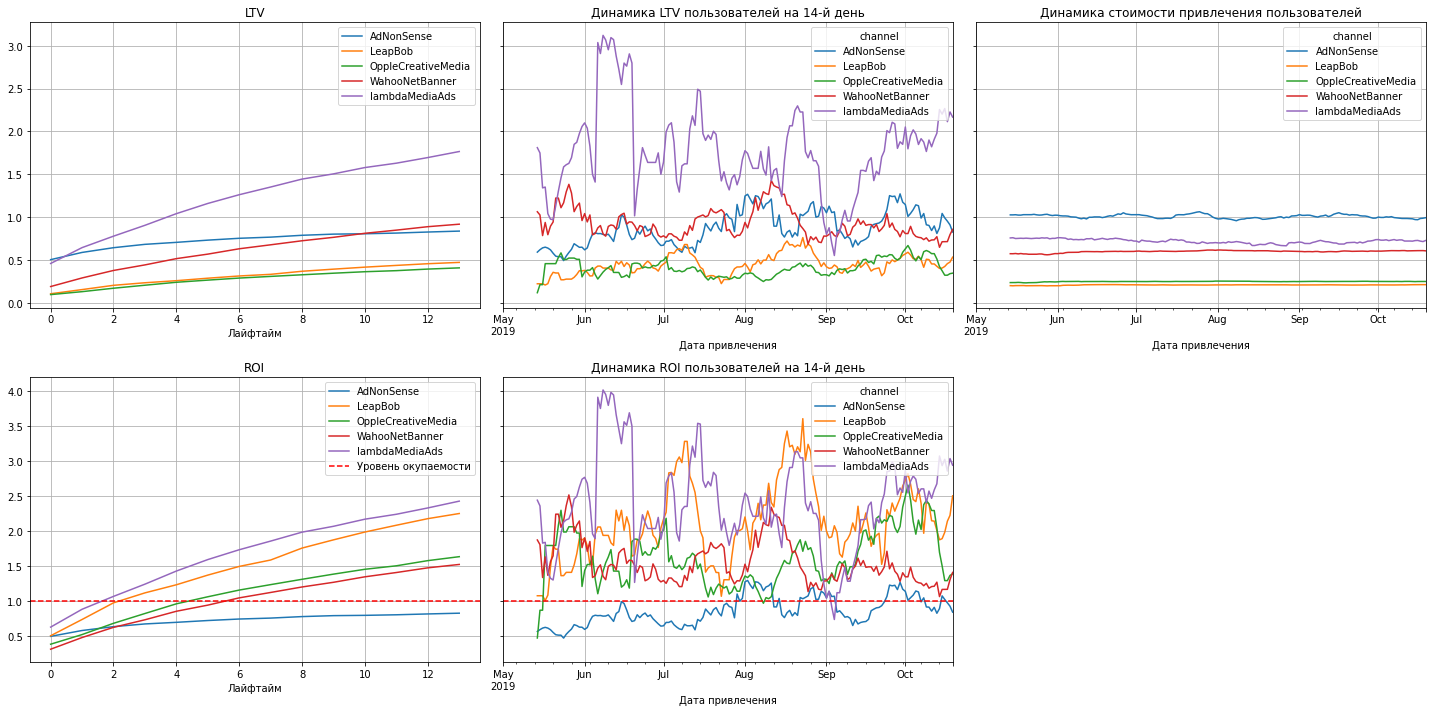

In [58]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В Европейском регионе не окупается один канал - AdNonSense, хоть и его цена привлечения стабильна

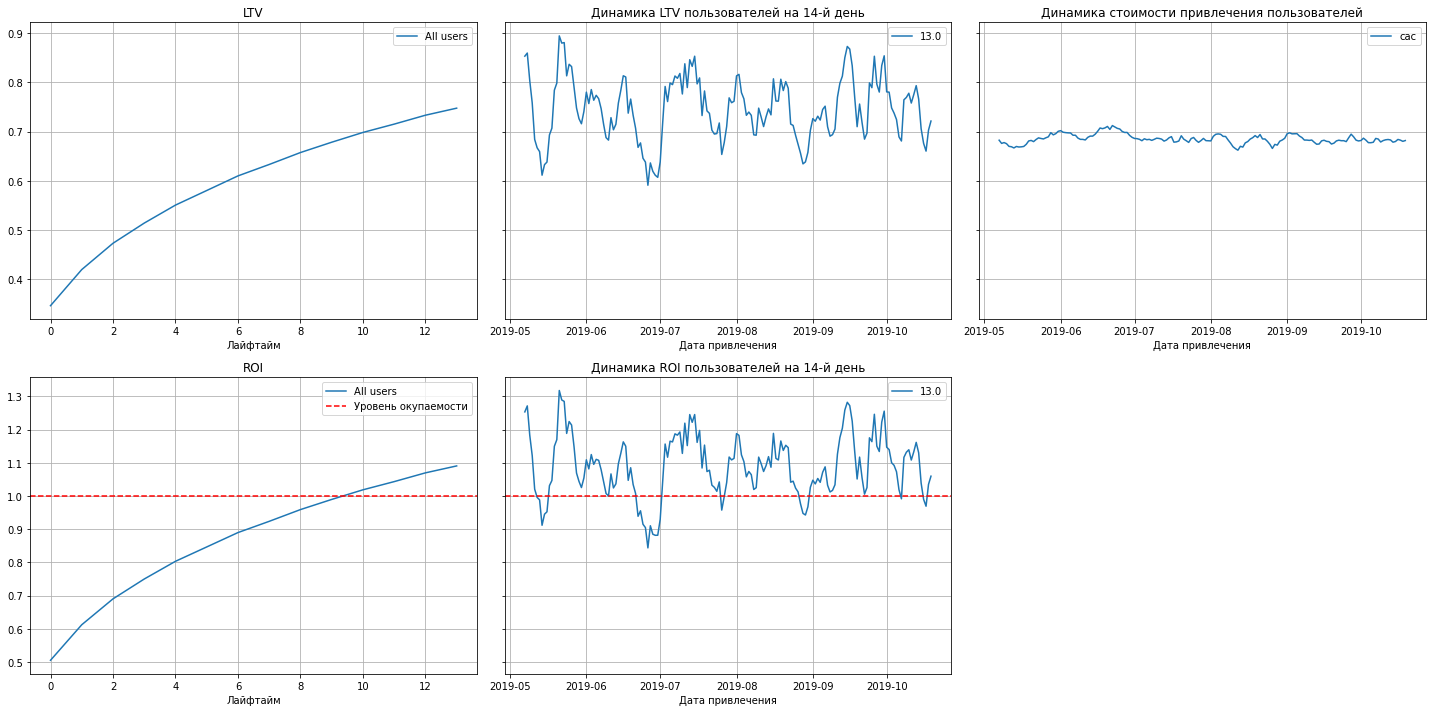

In [59]:
a = profiles_no_org.query('channel != "TipTop"') 
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    a, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Таким образом, можно сказать, что маркетинг не окупается в США из-за очень больших трат на каналы привлечения, которые приносят недостаточно качественных в экономическом плане покупателей. В целом проблема кроется в канале TipTop, который ежемесячно пднимает цену на свои рекламные услуги, и несмотря на то, что он приносит компании много новых пользователей (около 20 тысяч за период исследования) лишь 9.6% из них  становятся покупателями, что не является наивысшим показателем среди других каналов. Думаю от этого канала следует вовсе отказаться, ведь если мы посмотрим на окупаемость всей компании без него, она окупется уже на 10 лайфтайм. В Европейском регионе дела обстоят лучше, в целом регион окупается, но убытки приносит канал AdNonSense, однако он же приносит и 11% платяжих пользователей (среди европейских каналов этот показатель наивысший), но по их кол-ву он равен WahooNetBanner, который окупается. Так что возможно маркетолагам стоит закупать больше рекламы у WahooNetBanner и отказаться от  AdNonSense. 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Мы провели работу и проанализировали  приложение Procrastinate Pro+. Определили причины, по которым компания терпит убытки и постарались помочь ей выйти в плюс.

Детальнее:
1. Мы получили данные о посещениях пользователей с 1 мая по 27 октября 2019 года, а также информацию об их покупках и расходах на рекламу. Мы обработали эти данные для анализа: поменяли тип данных, где это необходимо, и привели названия столбцов к стандартному виду.
2. Далее мы загрузили функции для создания профилей пользователей, для подсчёта Retention Rate,  для подсчёта конверсии, для подсчёта LTV, а также функции для построения графиков: для сглаживания данных, для построения графика Retention Rate, для построения графика конверсии, для визуализации LTV и ROI.
3. На третьем шаге мы провели исследовательский анализ данных: составили профили пользователей и вяснили следующее: что пользователи приходят в приложение из 4 стан - Германии, Франции, Великобритании и США (Больше всего платящих пользователей в США - 7%); пользователи пользуются 4 устройствами - РС, Мас, iPhone и Android (Больше всего платящих пользователей у Мас - 6%); пользователи приходят в приложение благодаря 10 платных каналов (Наибольшее число покупателей приносит FaceBoom - 12%)
4. На четвертом шаге мы оценили расходы на маркетинг. Выяснили, что общие расходы составляют 105 497 д.е. Больше всего трат уходит на каналы привлечения TipTop и FaceBoom (более 80% всех расходов суммарно). Показатели Сас у этих каналов также наивысшие.
5. В закличение мы проверили окупаемость рекламных затрат по регионам, устройствам и каналам привлечения. Мы выянили, что реклама компании в целом не окупается. **Причинами неэффиктивности привлечения пользовалей** является проблема окупаемости связана с чрезмерно высокой ценой привевленеия пользователей и не соответсвующим ей качеством этих пользователей (их пожизненной ценности), что связано с низким удержанием новых пользователей в США, среди владельцев Mac и iPhone, а также у привлеченных через каналы FaceBoom и AdNonSense. А также неокупаемость затрат на каналы привлеченя, а точнее на FaceBoom, AdNonSense и TipTop. TipTop и FaceBoom, распространенные в США, имеют слишком высокую цену привлечения пользователей, которая регулярно растет (у TipTop), имеено поэтому американский рынок компании не окупается. На европейском рынке все лучше, в целом он окупается, убытки составляет лишь AdNonSense, но они покрываются доходами с других каналов. **Рекомендации** для отдела маркетинга следующие: следует установить возможные технические причины низского удержания пользователей и примнять меры по их ликвидации. А также избавиться от канала привлечения TipTop, тк он приносит не максимальную долю покупателей, а затраты на него нерационально большие. Каналы FaceBoom можно тоже постараться заменить, хотя он привлекает наибольшее число новых пользователей, а следовательно потенциальных покупателей, может быть лучше улучшить качество самой рекламы через этот канал. Можно присматреться к каналу YRabbit, который имеет наивысшую окупаемоть и нисшую цену, при этом приносит компании почти 4% покупателей, при хорошей работе этот показатель может быть улучшен. AdNonSense на европейском рынке можно также заменить новым, ведь он превлекает не так много новых посетителей и при этом не окупается. Можно обратить больше внимания на lambdaMediaAds, который приносит 10% покупателей, при этом стабильно окупается, возможно стоит закупань у них польше рекламы.

Таким образом, мы постарались помочь компании разобраться в проблемах и выйти в плюс, предоставив свои рекомендации.